# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

In [5]:
!git clone https://github.com/aronpwong/unsupervised-learning-24.git

Cloning into 'unsupervised-learning-24'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 7 (delta 0), reused 5 (delta 0), pack-reused 0
Receiving objects: 100% (7/7), 36.69 KiB | 1.41 MiB/s, done.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [19]:
wholesale_df = pd.read_csv('/content/unsupervised-learning-24/Wholesale_Data.csv')
wholesale_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [20]:
wholesale_df.shape

(440, 8)

In [22]:
wholesale_df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [23]:
wholesale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [24]:
wholesale_df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


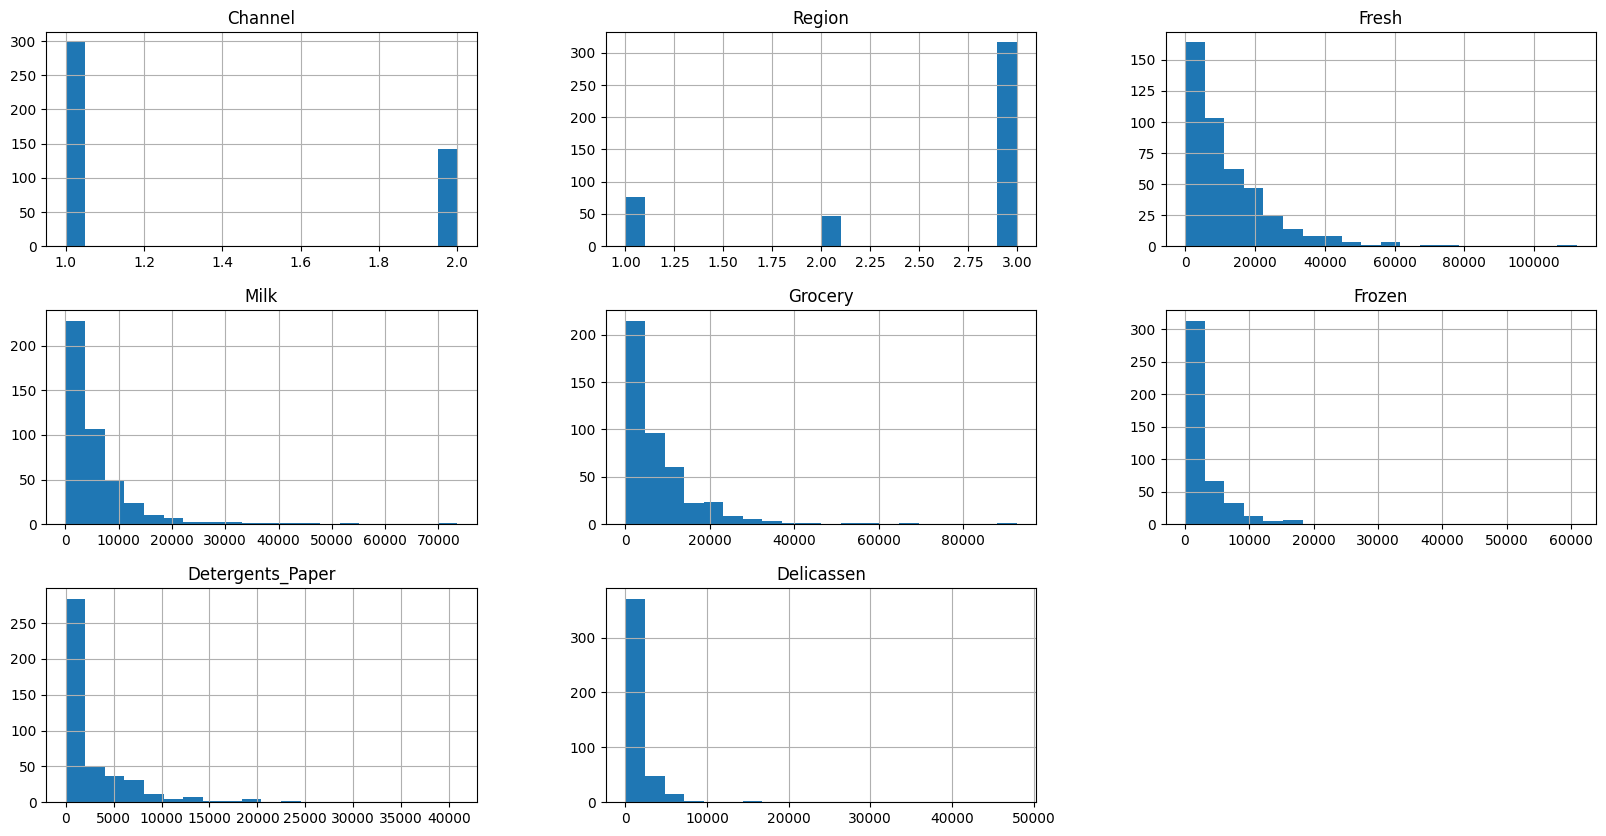

In [26]:
wholesale_df.hist(bins=20, figsize=(20,10))
plt.show()

Observation of Distribution of All Variables


*   Channel shows that majority of concentration of customers can be found in the H.O.R.E.C.A. channel with a significant difference with retail channel.
*   The distribution within the Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen indicates customers have low to moderate spending habits. There are a few outliers of high spenders.

In [21]:
wholesale_df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [27]:
wholesale_df.duplicated().sum()

0

In [29]:
numerical = wholesale_df.select_dtypes(include=['int64'])
numerical.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [30]:
log_data = np.log(numerical)
log_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.693147,1.098612,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,0.693147,1.098612,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,0.693147,1.098612,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,0.000000,1.098612,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,0.693147,1.098612,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


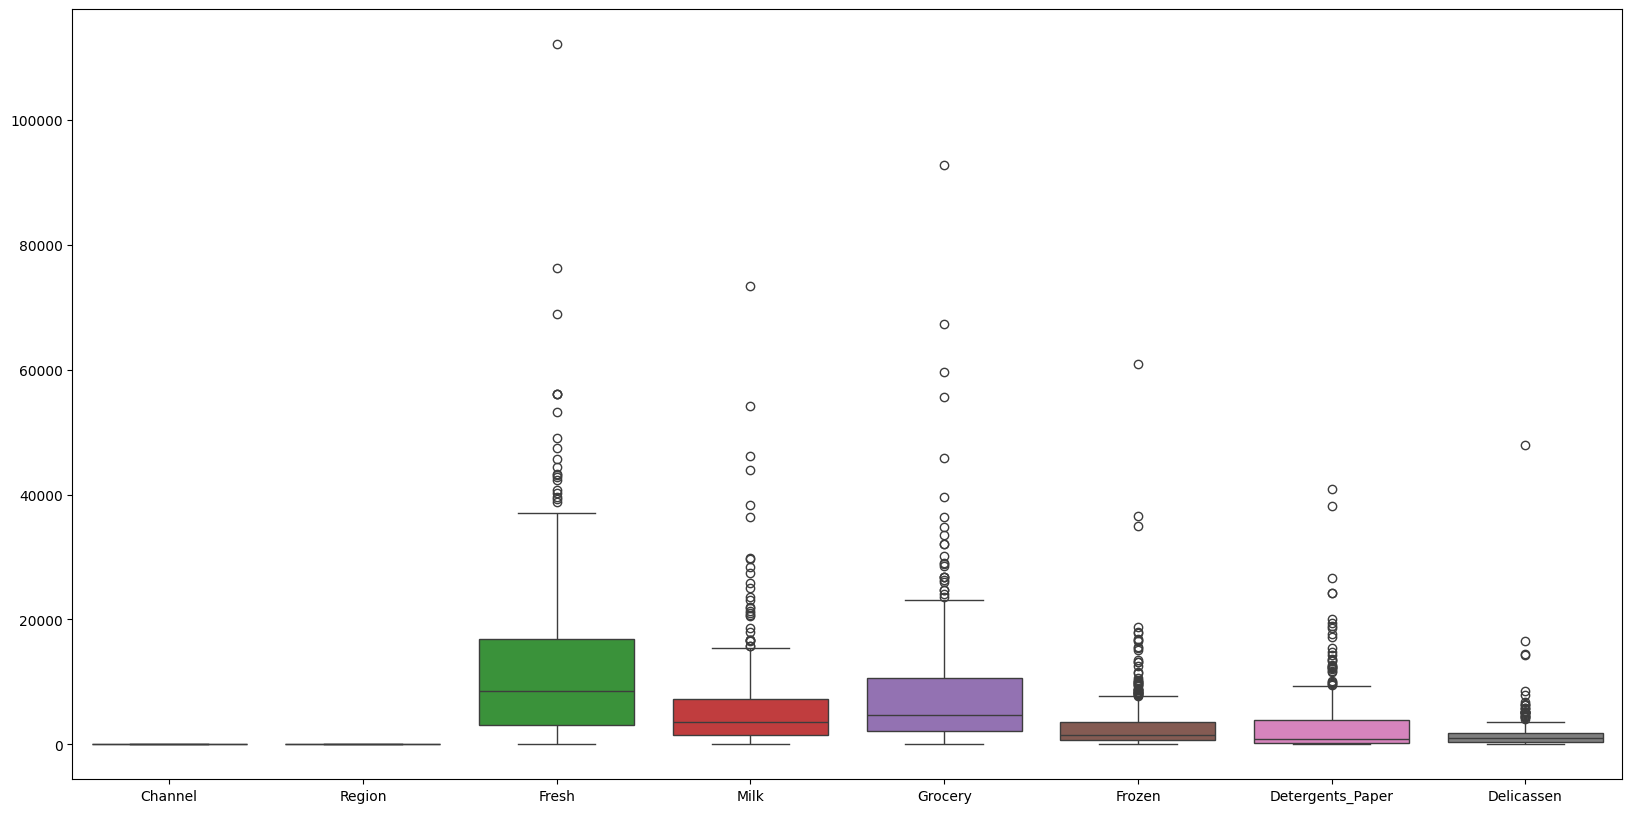

In [28]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=wholesale_df)
plt.show()

<Figure size 2000x1000 with 0 Axes>

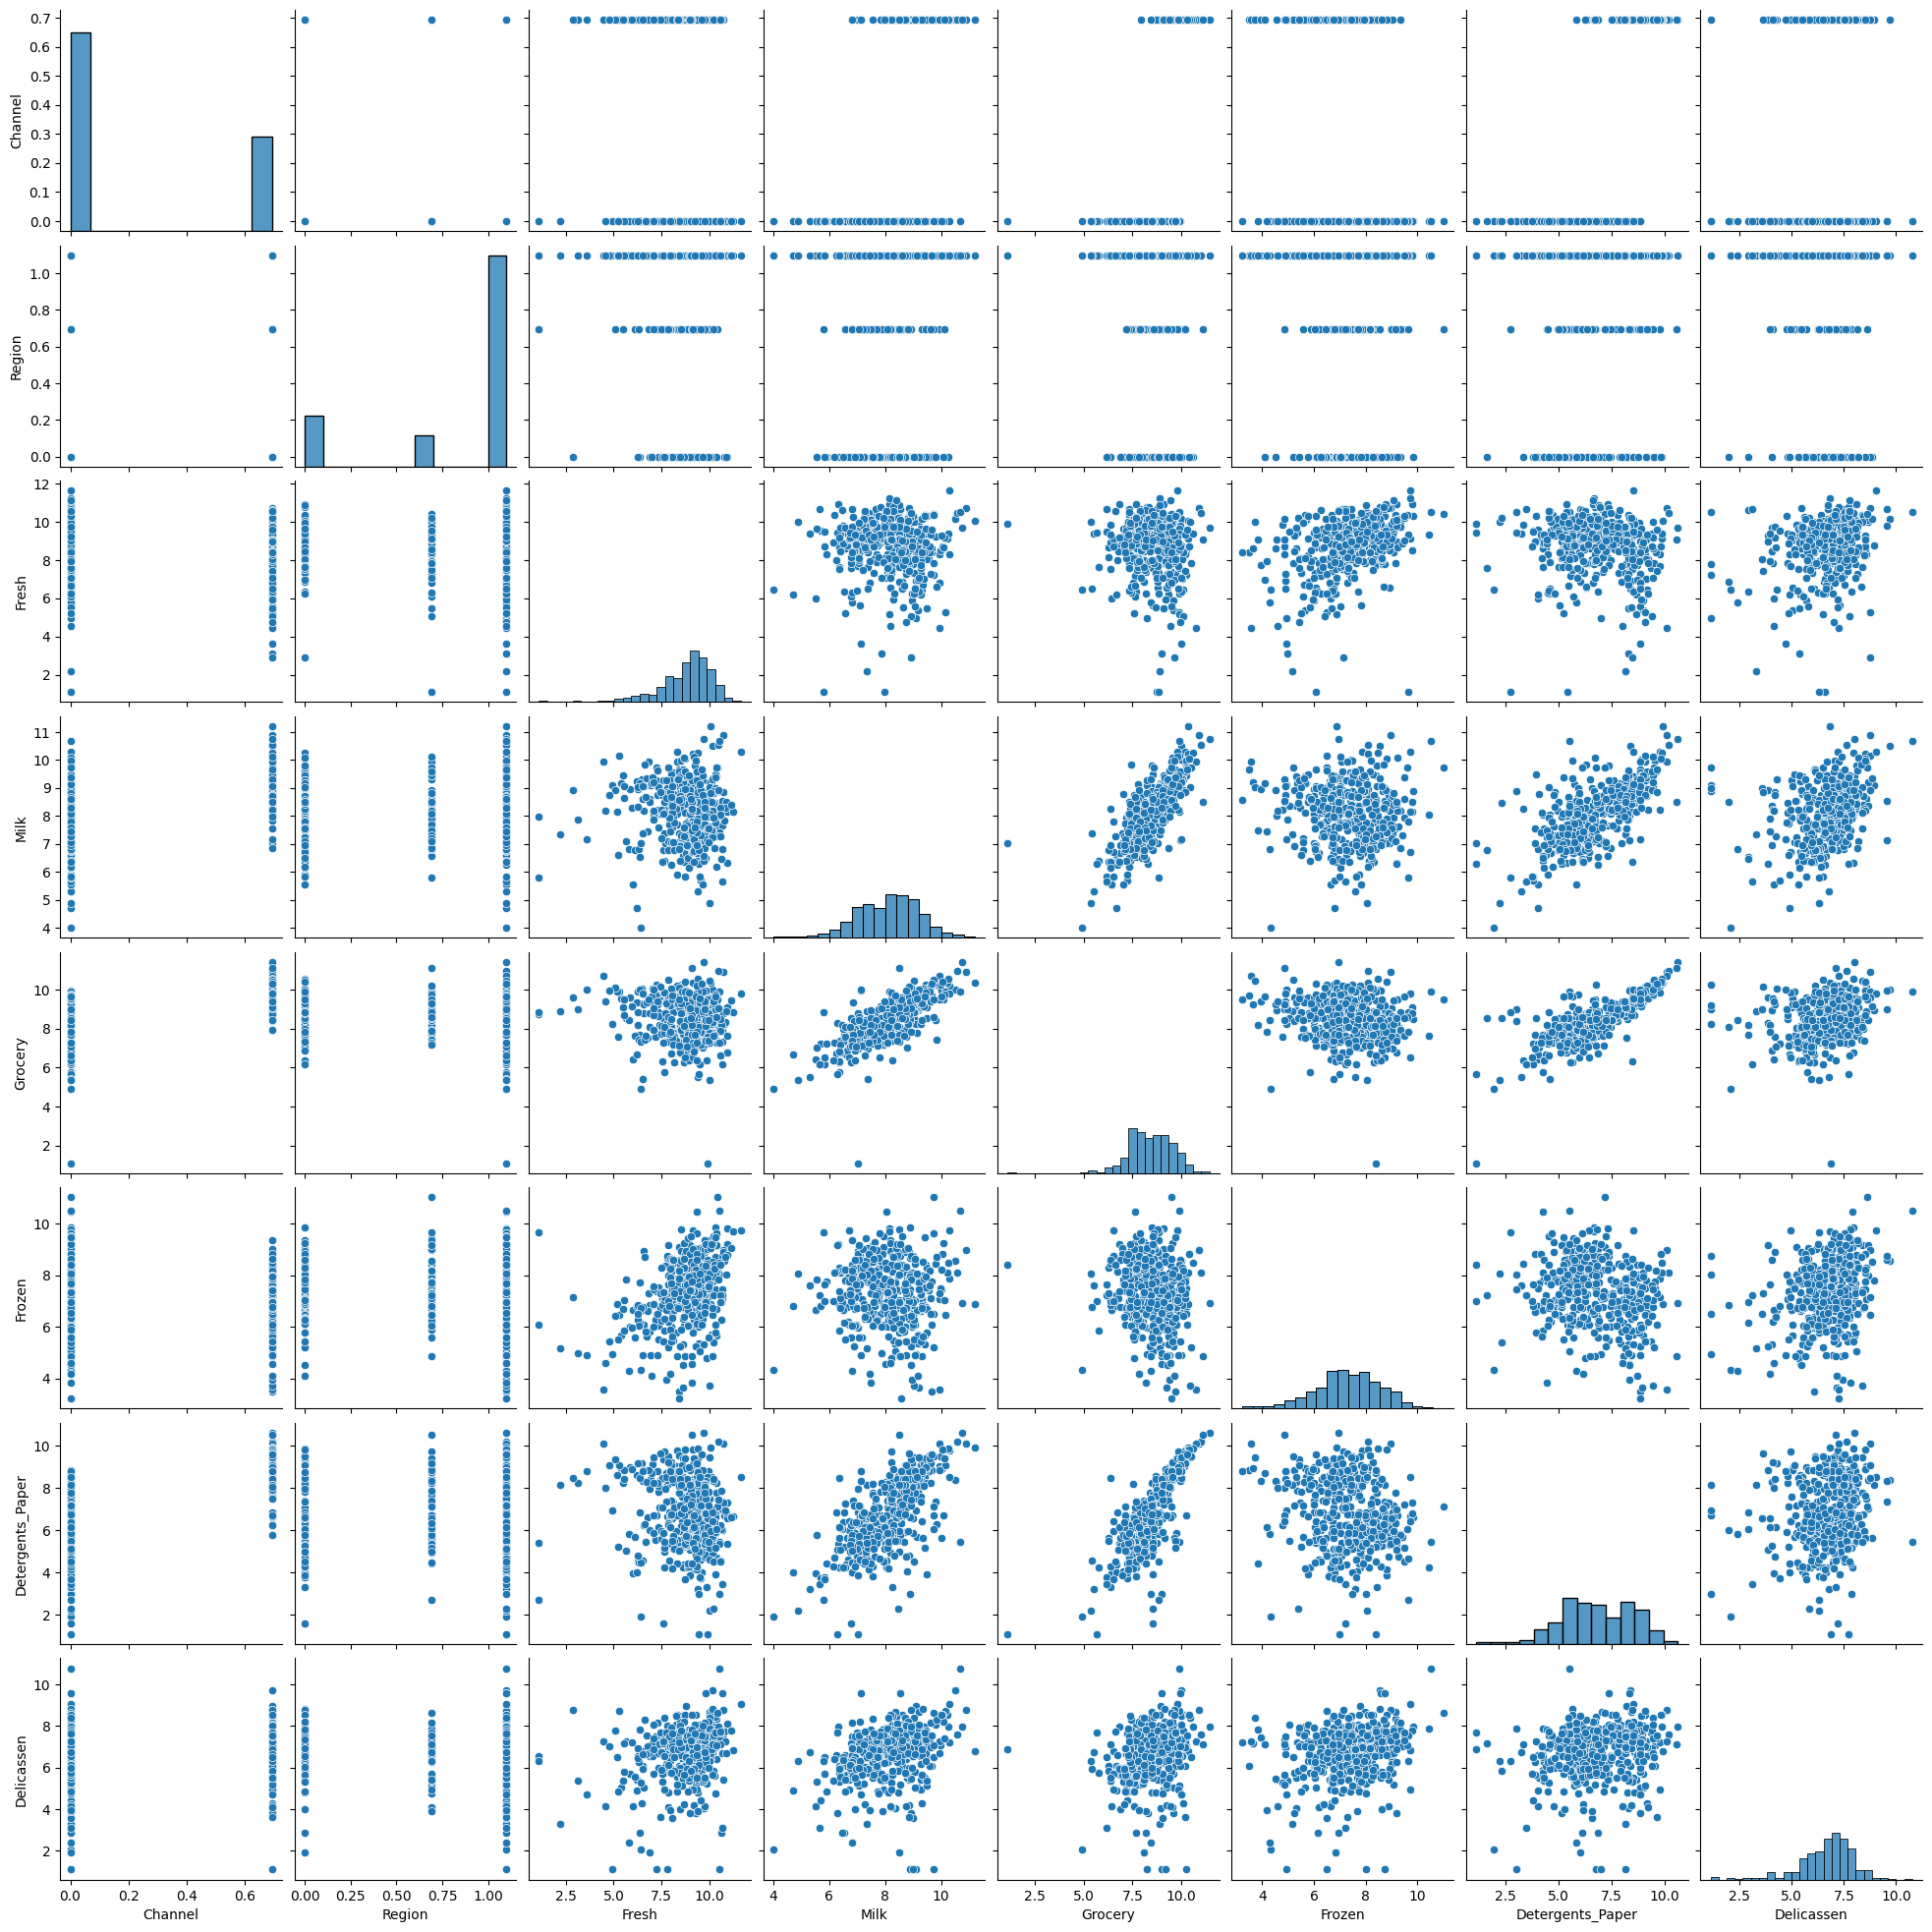

In [31]:
plt.figure(figsize=(20, 10))
sns.pairplot(log_data)
plt.show()

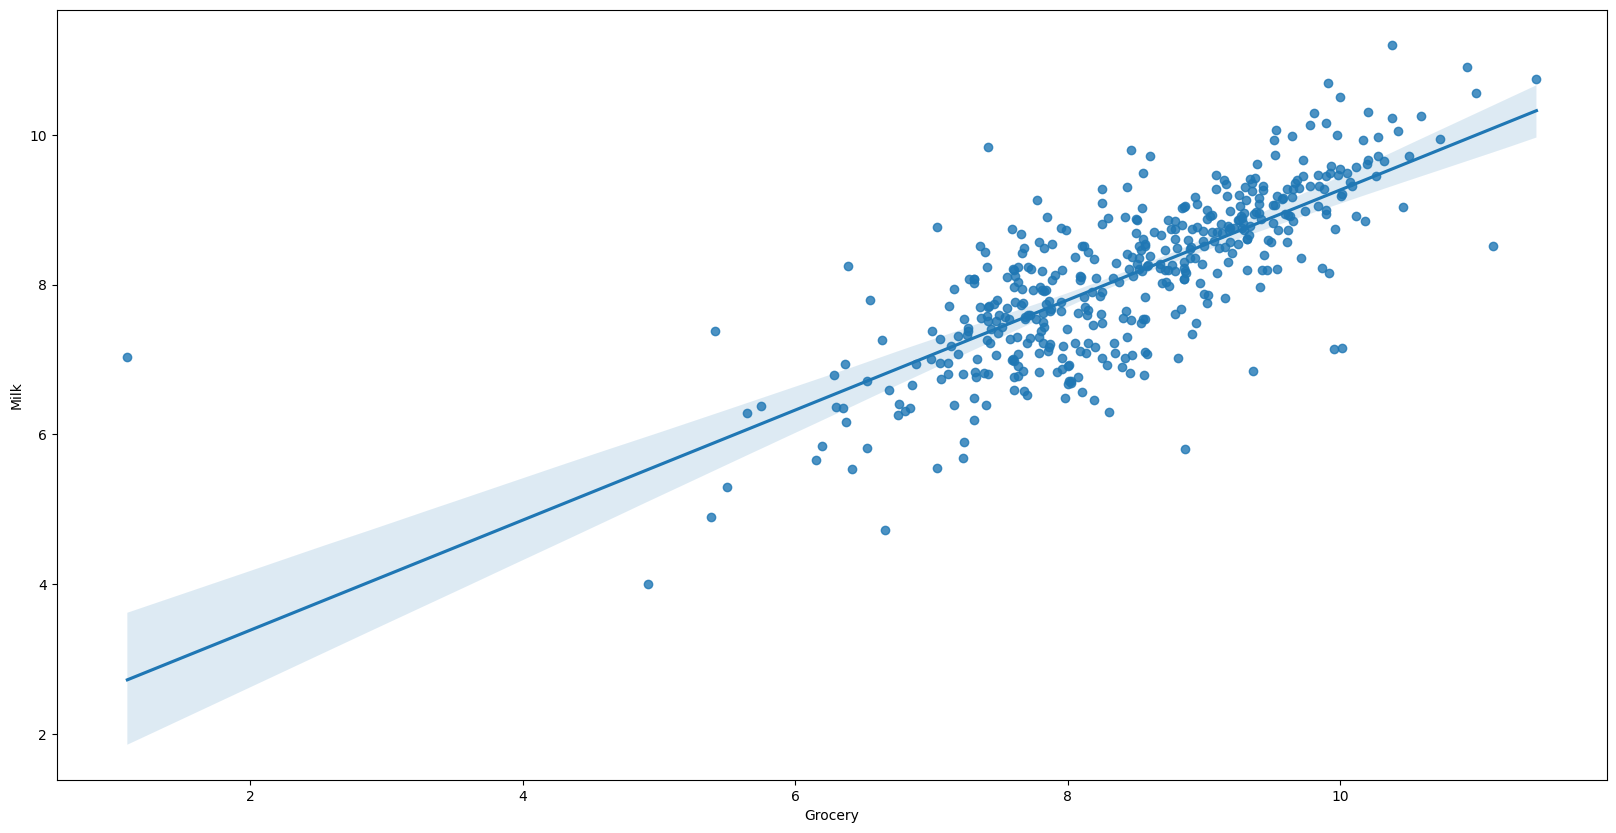

In [32]:
plt.figure(figsize=(20, 10))
sns.regplot(data=log_data, x='Grocery', y='Milk')
plt.show()

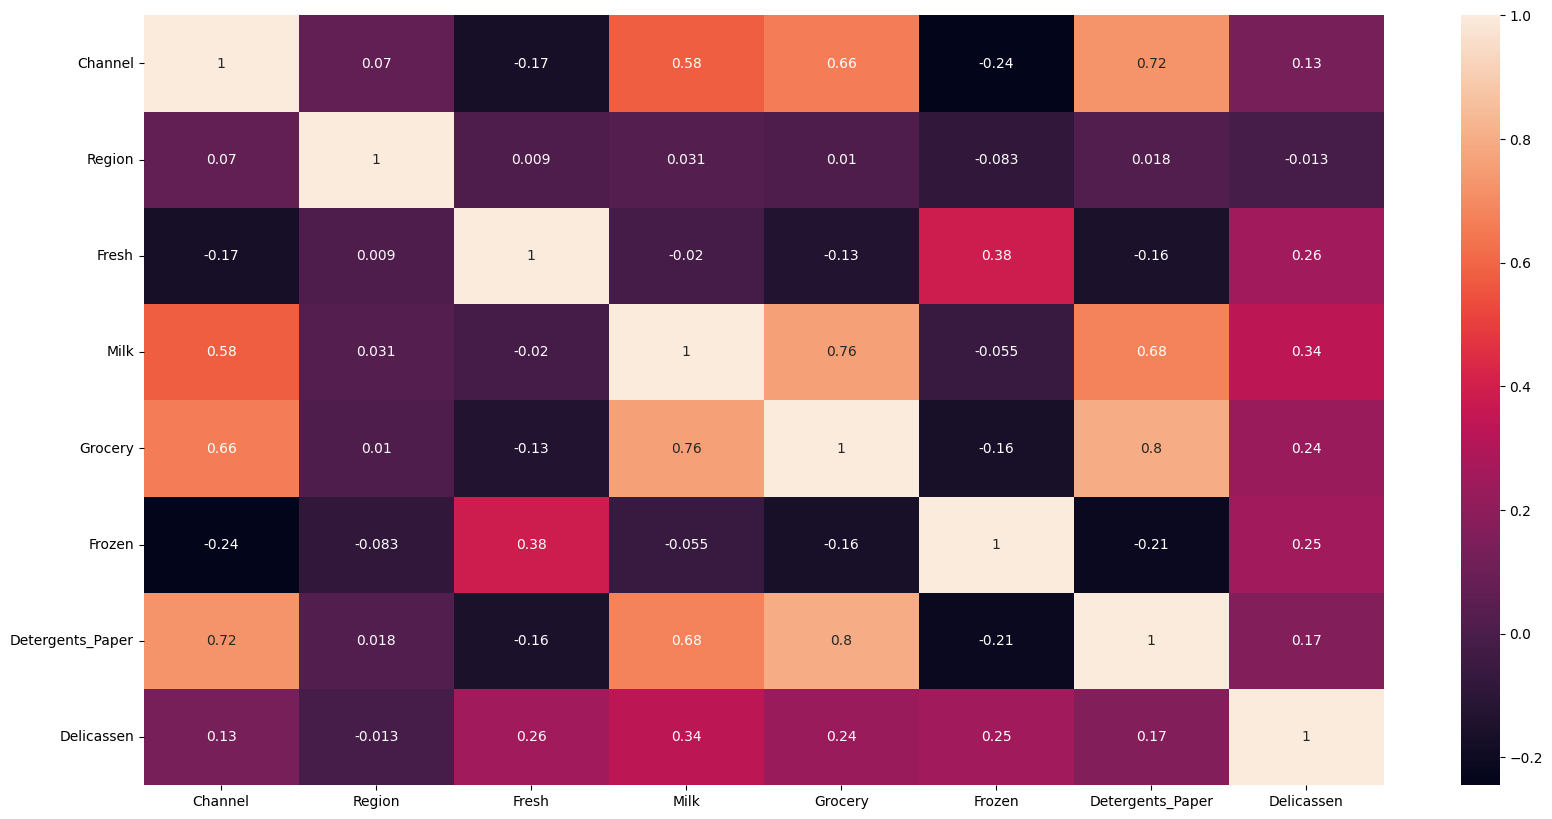

In [33]:
plt.figure(figsize=(20, 10))
sns.heatmap(log_data.corr(), annot=True)
plt.show()

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [34]:
channel = wholesale_df['Channel'].astype('category')
region = wholesale_df['Region'].astype('category')

In [40]:
data_f = pd.concat([log_data, channel, region], axis=1)
data_f.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel,Region
0,0.693147,1.098612,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931,2,3
1,0.693147,1.098612,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119,2,3
2,0.693147,1.098612,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504,2,3
3,0.000000,1.098612,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853,1,3
4,0.693147,1.098612,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525,2,3


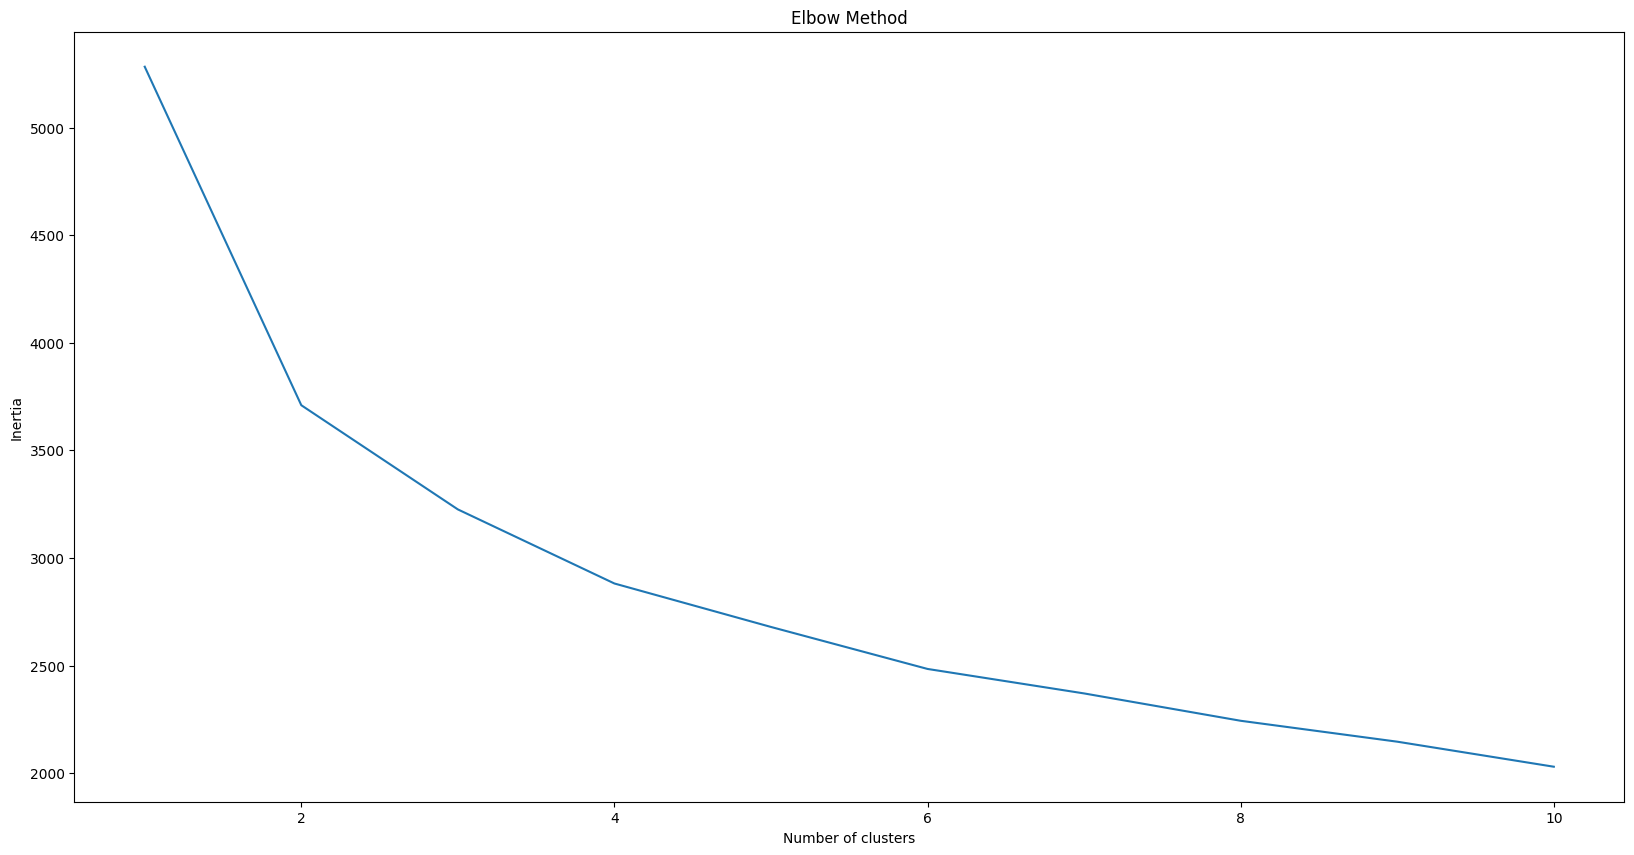

In [41]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_f)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [42]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_f)
data_f['Cluster'] = kmeans.predict(data_f)
dataframe.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel,Region,Cluster
0,0.693147,1.098612,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931,2,3,0
1,0.693147,1.098612,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119,2,3,0
2,0.693147,1.098612,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504,2,3,0
3,0.000000,1.098612,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853,1,3,1
4,0.693147,1.098612,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525,2,3,0


In [73]:
kmeans.inertia_

1398.005301962468

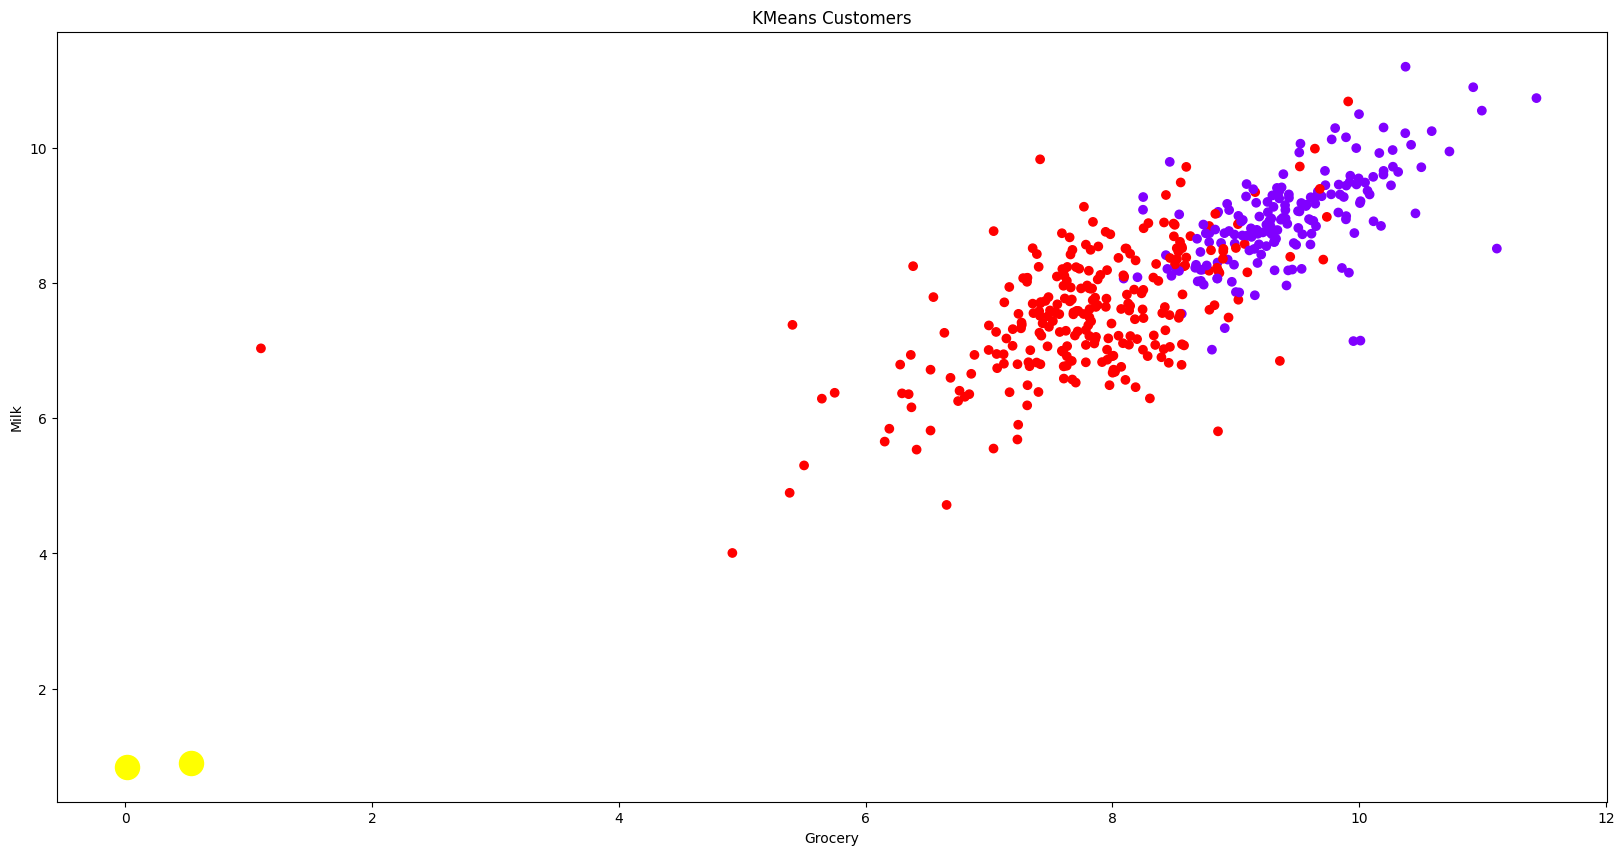

In [44]:
kmeans.cluster_centers_

plt.figure(figsize=(20, 10))
plt.scatter(data_f['Grocery'], data_f['Milk'], c=data_f['Cluster'], cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('KMeans Customers')
plt.xlabel('Grocery')
plt.ylabel('Milk')
plt.show()

In [45]:
data_f.drop('Grocery', axis=1, inplace=True)
data_f.drop('Detergents_Paper', axis=1, inplace=True)

In [46]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_f)
dataframe['kk_Cluster'] = kmeans.predict(data_f)

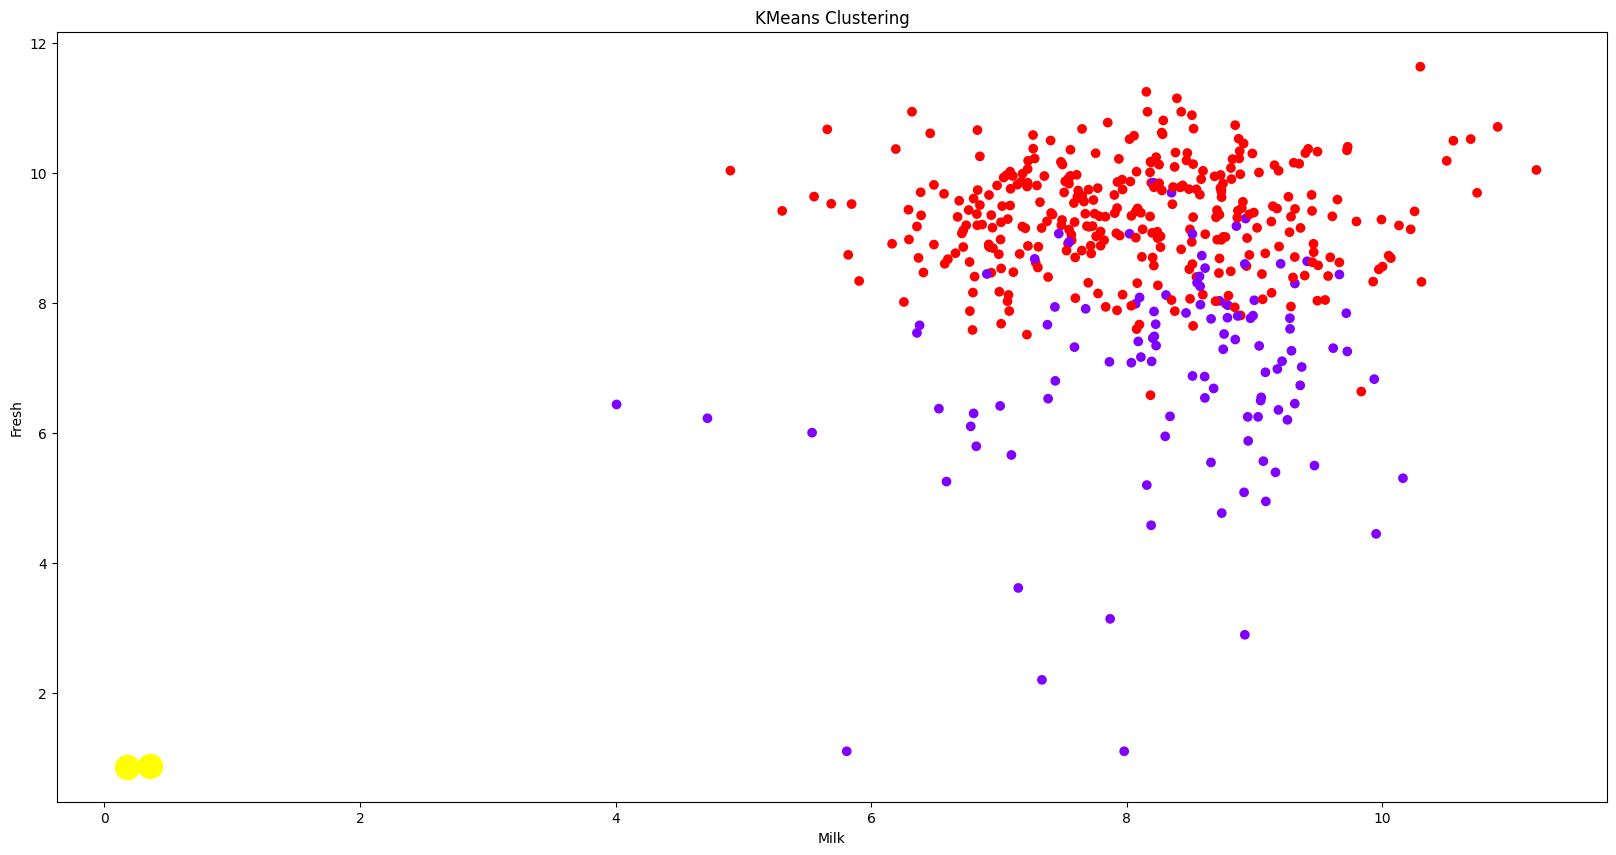

<Figure size 640x480 with 0 Axes>

In [47]:
plt.figure(figsize=(20, 10))
plt.scatter(data_f['Milk'], data_f['Fresh'], c=dataframe['kk_Cluster'], cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow')
plt.title('KMeans Clustering')
plt.xlabel('Milk')
plt.ylabel('Fresh')
plt.show()
plt.savefig('KMeans.png')

# Part III - Hierarchical Clustering

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

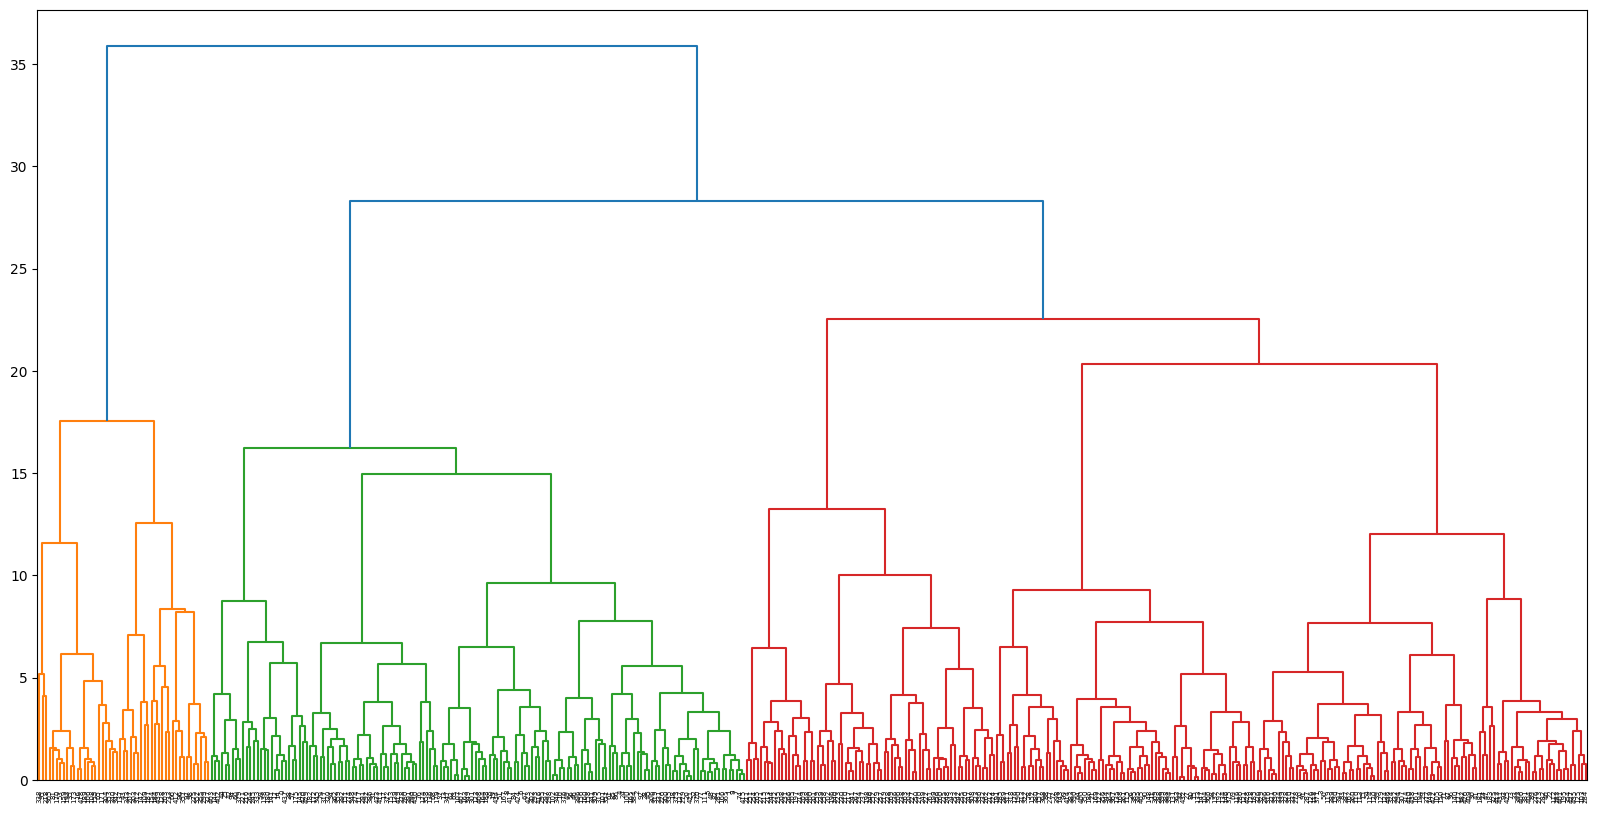

In [48]:
plt.figure(figsize=(20, 10))
dendrogram = sch.dendrogram(sch.linkage(data_f, method='ward'))
plt.show()

In [49]:
agg = AgglomerativeClustering(n_clusters=3)
dataframe['H_Cluster'] = agg.fit_predict(data_f)

In [50]:
dataframe.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel,Region,Cluster,kk_Cluster,H_Cluster
0,0.693147,1.098612,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931,2,3,0,1,2
1,0.693147,1.098612,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119,2,3,0,1,2
2,0.693147,1.098612,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504,2,3,0,1,2
3,0.000000,1.098612,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853,1,3,1,1,0
4,0.693147,1.098612,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525,2,3,0,1,2


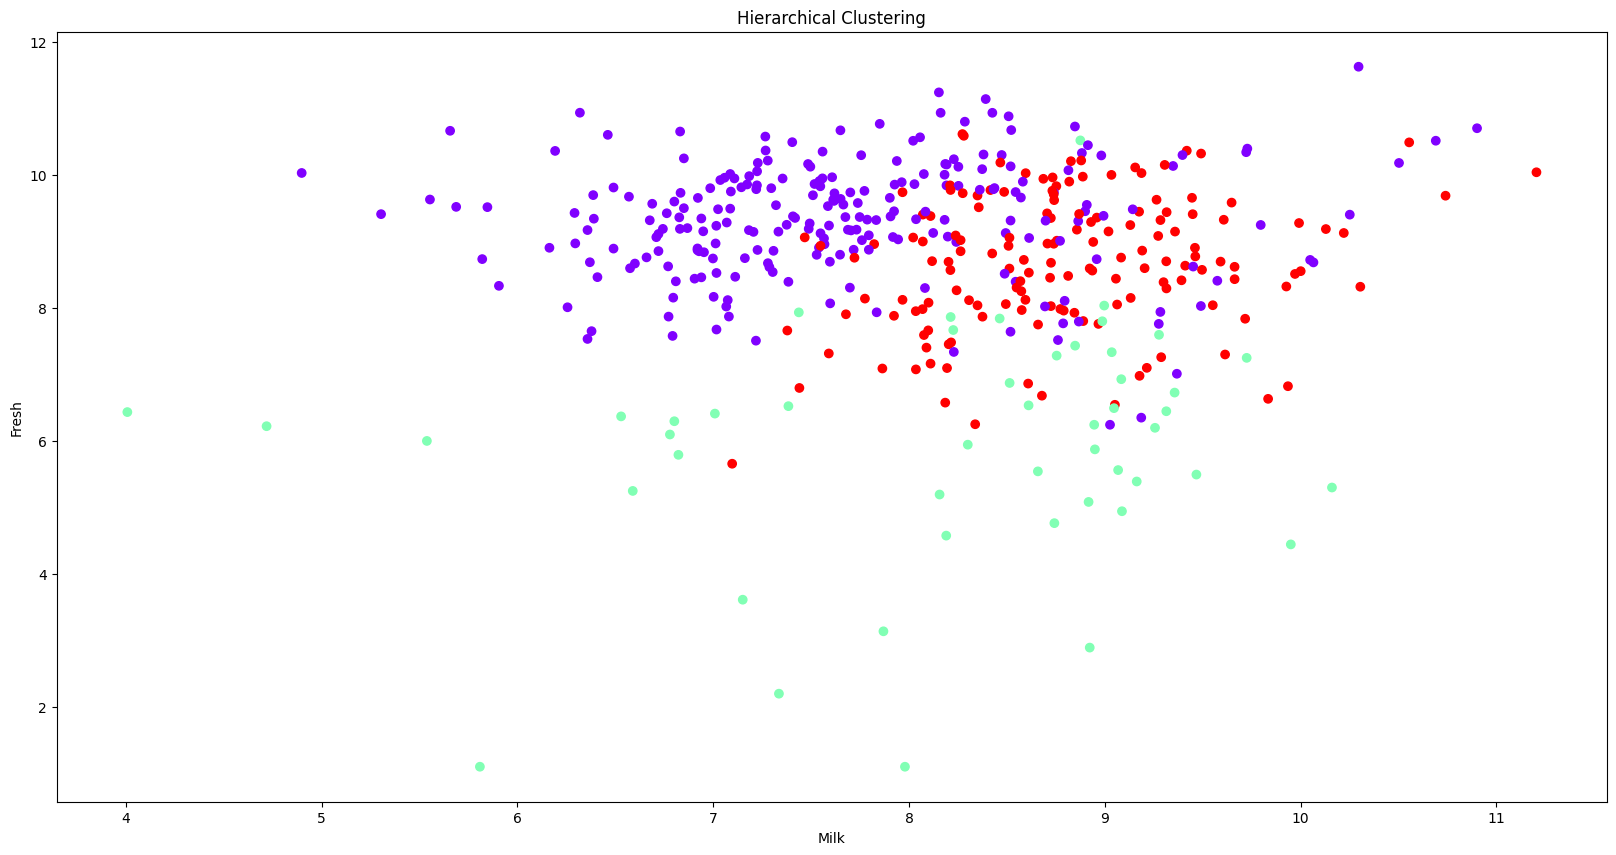

<Figure size 640x480 with 0 Axes>

In [51]:
plt.figure(figsize=(20, 10))
plt.scatter(data_f['Milk'], data_f['Fresh'], c=dataframe['H_Cluster'], cmap='rainbow')
plt.title('Hierarchical Clustering')
plt.xlabel('Milk')
plt.ylabel('Fresh')
plt.show()
plt.savefig('Hierarchical.png')

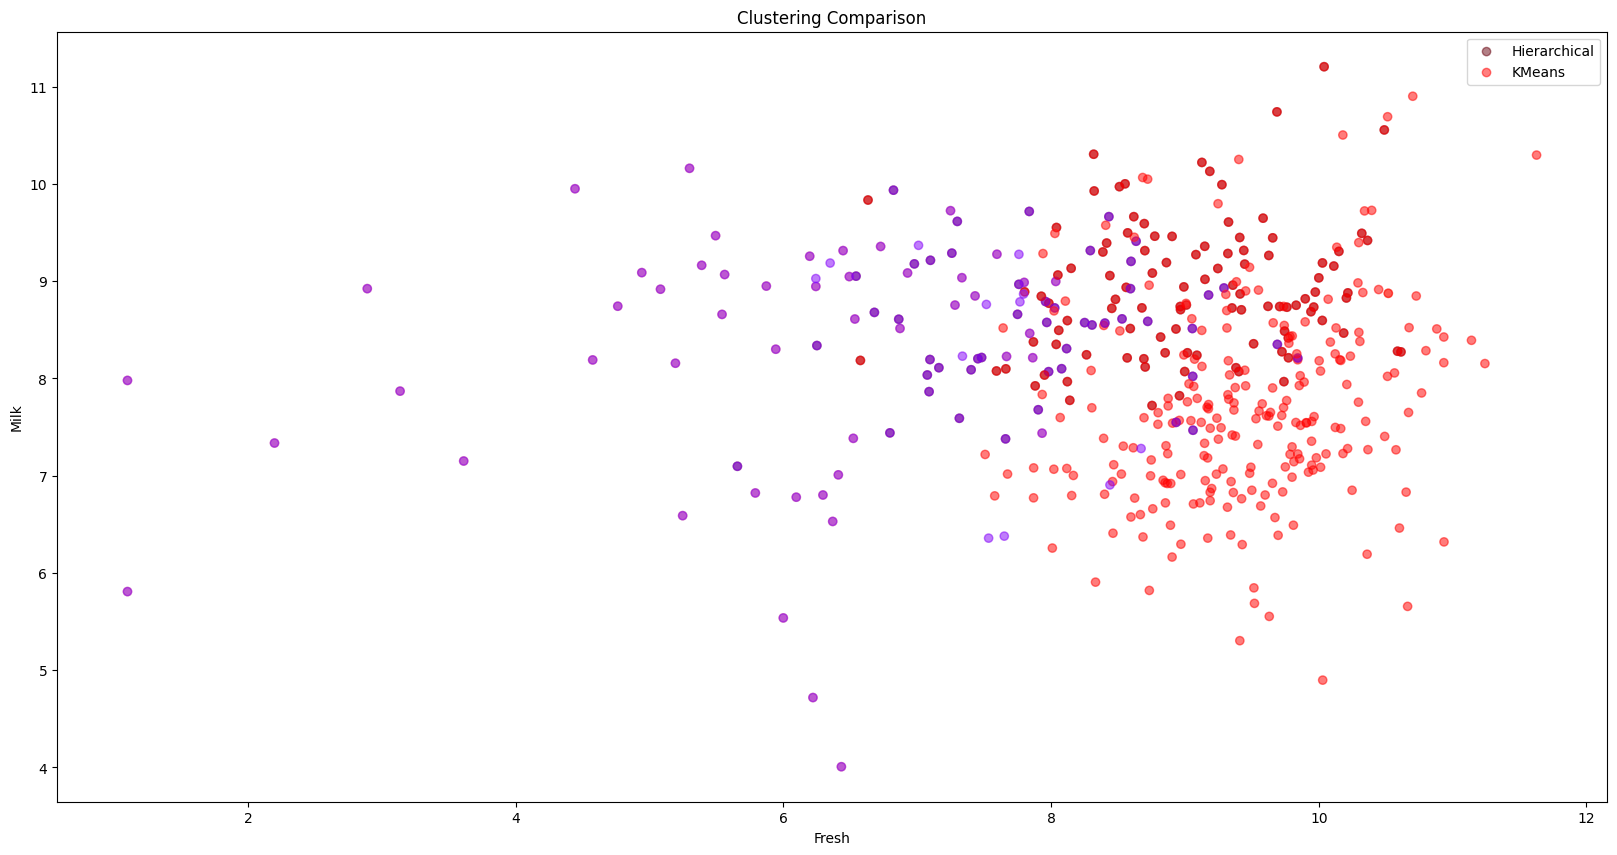

In [55]:
plt.figure(figsize=(20, 10))
plt.scatter(data_f['Fresh'], data_f['Milk'], c=dataframe['H_Cluster'], cmap='Reds', label='Hierarchical', alpha=0.5)
plt.scatter(data_f['Fresh'], data_f['Milk'], c=dataframe['kk_Cluster'], cmap='rainbow', label='KMeans', alpha=0.5)
plt.title('Clustering Comparison')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.legend()
plt.show()

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

Eigenvalues:
[3.05963546e+00 1.94148204e+00 1.19804963e+00 8.47060934e-01
 7.50124573e-01 2.15522965e-01 5.30419362e-02 1.41728445e-03
 5.05573729e-33]

Variances (Percentage):
[3.79309256e+01 2.40689493e+01 1.48524659e+01 1.05011874e+01
 9.29944752e+00 2.67188221e+00 6.57571715e-01 1.75703648e-02
 6.26770077e-32]



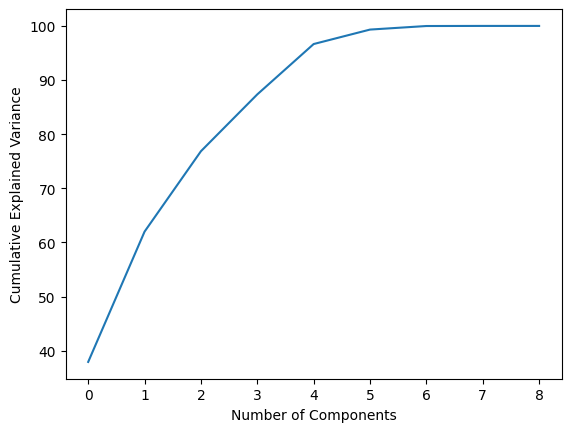

In [76]:
pca = PCA(n_components=None)
pca.fit(data_f)

print('Eigenvalues:')
print(pca.explained_variance_)
print()

print('Variances (Percentage):')
print(pca.explained_variance_ratio_ * 100)
print()

plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [77]:
pca_components = abs(pca.components_)
print(pca_components)

[[3.13439033e-02 1.01528741e-02 7.17777513e-01 5.48481826e-02
  5.24193120e-01 4.44465920e-01 4.52196939e-02 1.77866314e-02
  7.75372910e-02]
 [1.43486366e-01 1.62132178e-02 2.40983053e-01 6.32324424e-01
  1.98483894e-01 6.18911384e-01 2.07007069e-01 3.04051727e-02
  2.34559643e-01]
 [5.88357062e-02 9.70203360e-02 6.38904378e-01 1.49798047e-01
  6.80988426e-01 2.09473307e-01 8.48819815e-02 1.84379199e-01
  8.75340642e-02]
 [1.19343541e-01 6.30703978e-03 5.66534908e-02 6.06770473e-01
  4.24700812e-01 6.11749075e-01 1.72176335e-01 1.18751911e-02
  1.73043043e-01]
 [6.41760233e-03 4.62473960e-01 1.11017531e-01 5.39549465e-02
  1.71198683e-01 2.42853185e-02 9.25864306e-03 8.60515078e-01
  1.92337002e-02]
 [4.36147547e-01 1.76768490e-03 4.71243507e-02 4.44790593e-01
  1.05747055e-01 2.61913876e-02 6.29227904e-01 2.25826980e-02
  4.48783528e-01]
 [3.08116370e-01 8.52225922e-03 2.76884578e-02 7.60612706e-02
  3.48674312e-02 2.63059805e-03 4.44517960e-01 7.98612002e-03
  8.36395273e-01]
 [7.36

In [80]:
print()
print()

for row in range(pca_components.shape[0]):
    temp = np.argpartition(-(pca_components[row]), 7)

    indices = temp[np.argsort((-pca_components[row])[temp])][:8]

    print(f'Component {row}: {data_f.columns[ indices].to_list()}')



Component 0: ['Fresh', 'Frozen', 'Delicassen', 'Cluster', 'Milk', 'Channel', 'Channel', 'Region']
Component 1: ['Milk', 'Delicassen', 'Fresh', 'Cluster', 'Channel', 'Frozen', 'Channel', 'Region']
Component 2: ['Frozen', 'Fresh', 'Delicassen', 'Region', 'Milk', 'Region', 'Cluster', 'Channel']
Component 3: ['Delicassen', 'Milk', 'Frozen', 'Cluster', 'Channel', 'Channel', 'Fresh', 'Region']
Component 4: ['Region', 'Region', 'Frozen', 'Fresh', 'Milk', 'Delicassen', 'Cluster', 'Channel']
Component 5: ['Channel', 'Cluster', 'Milk', 'Channel', 'Frozen', 'Fresh', 'Delicassen', 'Region']
Component 6: ['Cluster', 'Channel', 'Channel', 'Milk', 'Frozen', 'Fresh', 'Region', 'Region']
Component 7: ['Region', 'Region', 'Channel', 'Channel', 'Cluster', 'Milk', 'Frozen', 'Fresh']
Component 8: ['Channel', 'Channel', 'Region', 'Frozen', 'Cluster', 'Delicassen', 'Milk', 'Fresh']


In [82]:
pca2 = PCA(n_components=3)
x_pca = pca2.fit_transform(data_f)

x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2
0,0.307639,-1.574547,-2.066515
1,-0.504216,-1.482379,-0.200039
2,-1.246153,-2.297150,0.406249
3,-1.665722,0.793378,0.805387
4,-2.202194,-1.330045,-0.086841


In [83]:
x_pca.shape

(440, 3)

In [84]:
data_f.shape

(440, 9)

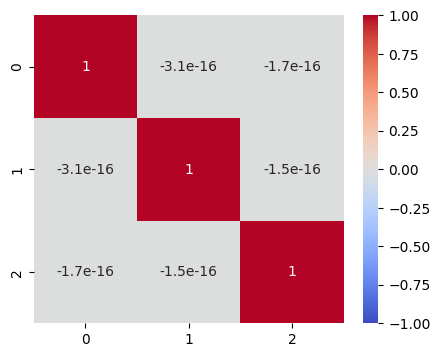

In [86]:
plt.figure(figsize=(5, 4))
heatmap_pca = sns.heatmap(x_pca.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.show()

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

**EDA**
It is mostly right skewed distribution, highlighting majority of customers are low to moderate spenders with a few outliers of high spenders. Fresh category has the most annual spending which shows the most popular category with customers.

**KMeans**
Only 2 clusters were shown to be optimal with two distinct customer segments. This method is ideal in a business perspective for marketing and sales, tailoring the target audience properly.

**Hierachical Clustering**
This method highlights three customer segments with Fresh category playing a major factor in customer purchase behaviour. This data is further differentiate based on spending category.

**PCA**
PCA simplifies our data and explains a large percentage of variation in spending. One of the components highlight that customers prioritize Fresh, Frozen and Delicassen. The second component prioritize Milk and Delicassen but dislike Fresh. In a business perspective, this helps with tailor promotions and branding based on customer's spending behaviour.
